## Comencemos con convoluciones

El concepto viene de procesamiento de señales, matemáticamente está definido como:

$$I(x,y) * K= \sum_{i=-N}^N\sum_{j=-N}^N I(x- i, y -j) \times K(i,j)$$

ó

$$I(x,y) * K= \sum_{i=-N}^N\sum_{j=-N}^N I(x+i, y +j) \times K(-i , -j)$$

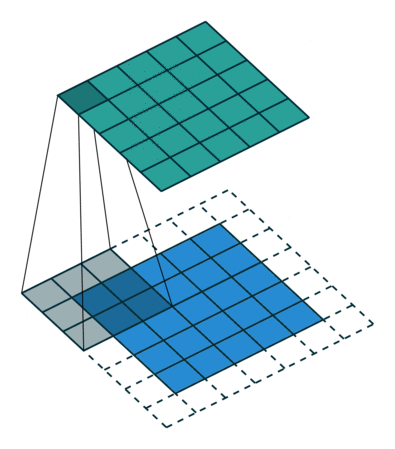

Programar la convolución probar y reportar los siguientes kernels




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

image_path  = '/content/drive/MyDrive/Colab_Notebooks/Homer_Simpson.png'

I = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

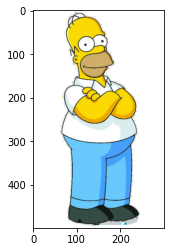

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(I)
plt.show()

In [ ]:
def apply_convolution(I, K):
  N = int(K.shape[0] / 2)
  print(N)
  I_c = np.zeros_like(I, dtype = np.float64)
  for x in range(N, I.shape[0] - N ):
    for y in range(N, I.shape[1] - N):
      for i in range(-N, N + 1):
        for j in range(-N, N + 1):
          I_c[x, y] += I[x + i, y + j] * K[ N - i, N - j]
  return I_c


In [ ]:
import numpy as np

K = (np.random.rand(3, 3) - 0.5) * 2

1


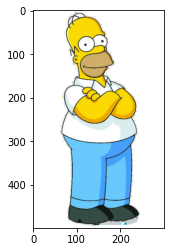

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


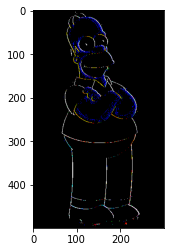

In [ ]:
I_c = apply_convolution(I, K)
plt.imshow(I)
plt.show()
plt.imshow(I_c)
plt.show()

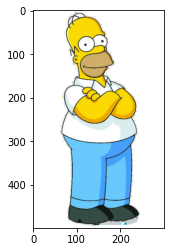

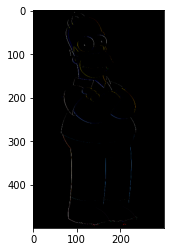

In [ ]:
import numpy as np

I_c2  = cv2.filter2D(I,-1, K)

plt.imshow(I)
plt.show()
plt.imshow(I_c2)
plt.show()

Usar y reportar los resultados obtenidos con los siguientes kernels

$$
K_1 = \begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0\\
\end{bmatrix}
$$

$$
K_2 = \begin{bmatrix}
1 & 0 & -1 \\
0 & 1 & 0 \\
-1 & 0 & 1\\
\end{bmatrix}
$$

$$
K_3 = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0\\
\end{bmatrix}
$$

$$
K_4 = \begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1\\
\end{bmatrix}
$$

$$
K_5 = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}
$$

$$
K_6 = \frac{1}{16}\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1\\
\end{bmatrix}
$$

In [ ]:
K_1 = np.array([[-1, -1, -1], [-1, 8, -1] , [-1, -1, -1]])

In [ ]:
print(K_1)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [ ]:
print(I.shape)

(500, 300, 3)


1


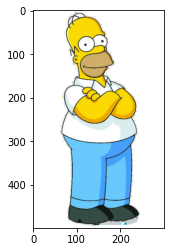

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


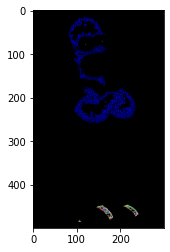

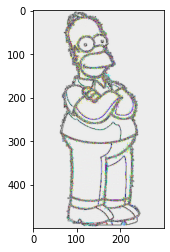

In [ ]:
I_c = apply_convolution(I[:, :,:], K_1)
plt.imshow(I)
plt.show()
plt.imshow(I_c)
plt.show()

plt.imshow(np.uint8((I_c- np.min(I_c)/(np.max(I_c) - np.min(I_c))) * 255))
plt.show()

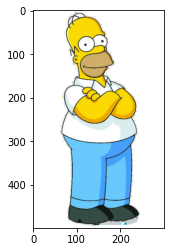

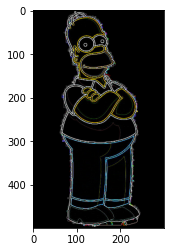

In [ ]:
import numpy as np

I_c2  = cv2.filter2D(I,-1, K_1)

plt.imshow(I)
plt.show()
plt.imshow(I_c2)
plt.show()

Justo las redes convolucionales neuronales (CNN's, por sus siglas en inglés) están basadas en convoluciones y aprender pesos de los kernels $K$

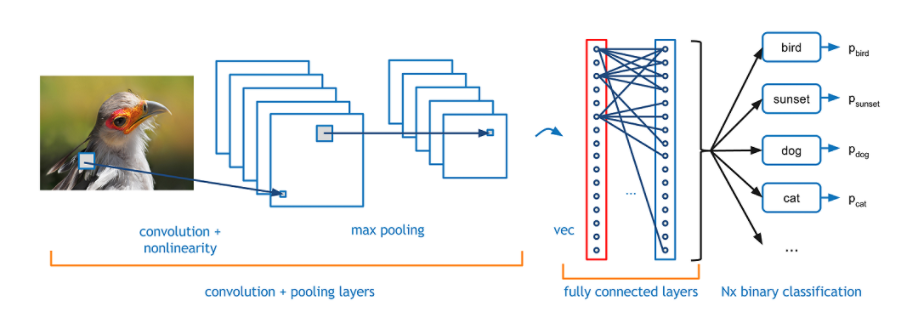

Recordando la definición de convolución:

$$I(x,y) * K= \sum_{i=-N}^N\sum_{j=-N}^N I(x+i, y +j) * K(-i , -j)$$

Dado que los pesos iniciales de $K$ son aleatorios, se puede eliminar el cálculo de la simetría, es decir aplicaremos correlación cruzada:


$$I(x,y) * K= \sum_{i=-N}^N\sum_{j=-N}^N I(x+i, y +j) * K(i , j)$$

Ventajas de las CNN's respecto a los MLP (capas densas)

Suponiendo que tengamos una imagen de $224\times 224 \times 3$ píxeles, se necesitarían $100, 352$ neuronas en la capa de entrada

Usando capas convolucionales solo necesitariamos 4096 + 1000 neuronas en total

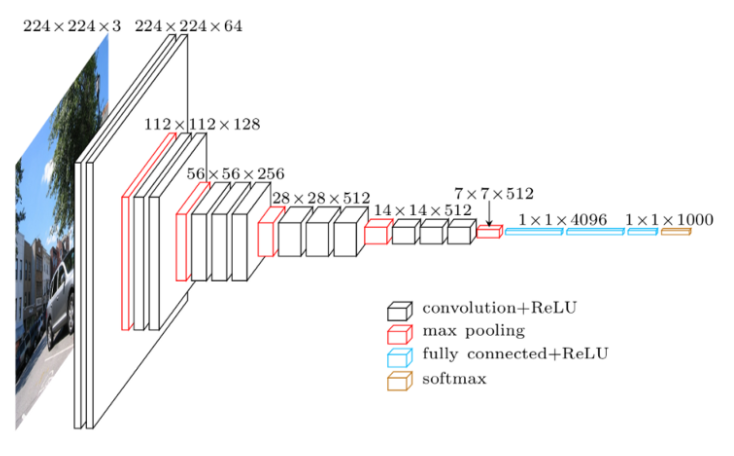

Para una imagen de tamaño $4\times4$ y si el filtro es de $3\times3$ tendríamos una salida de $2\times2$

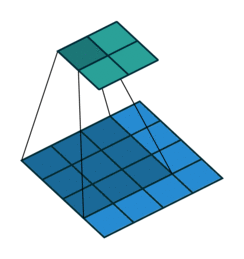

¿Cuál sería el tamaño de salida para cualquier entrada y kernel?

$(N \times N) * (F \times F) = (N-F+1)\times(N-F+1)$


Pregunta: ¿Tendría sentido hacer una convolución con kernels de tamaño $1 \times 1$?

Respuesta: sí

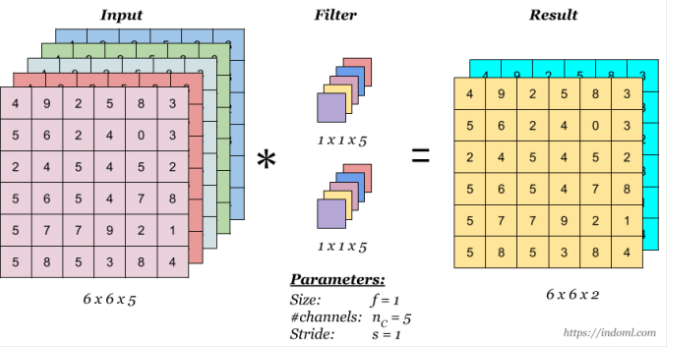

### Stride (paso) y dilatación

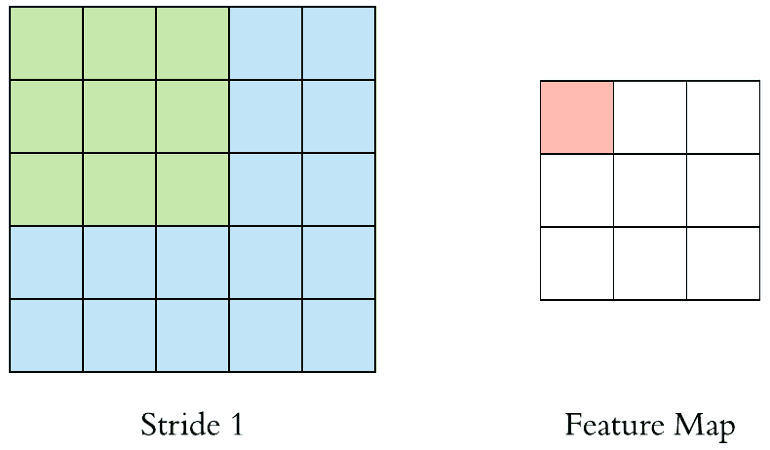

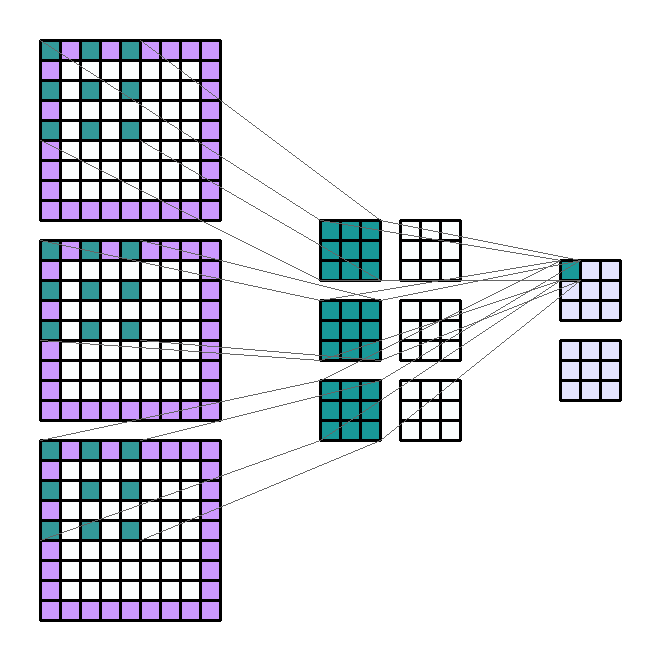

¿Cómo se aplican las convoluciones en una CNN's?

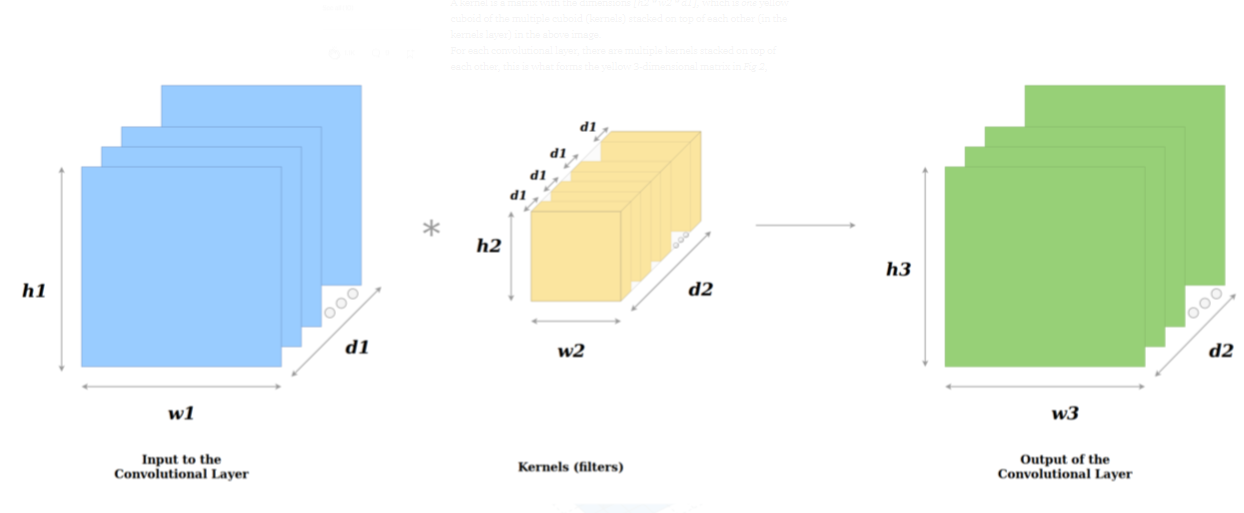

Entonces como se define una capa neuronal convolucional

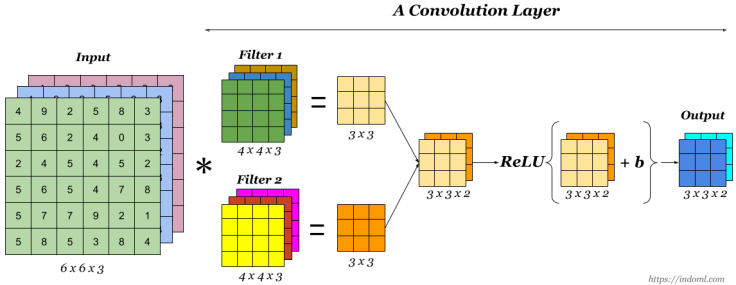

En keras se define como:

out = Conv2D(2, (4, 4), activation='relu')(input)

La operación Pooling

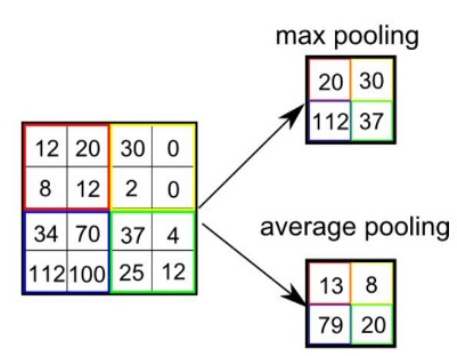

En Keras se define como:
- MaxPooling2D(pool_size=(2, 2))
y

- AveragePooling2D(pool_size=(2, 2))

Actividad: implementar la red Lenet

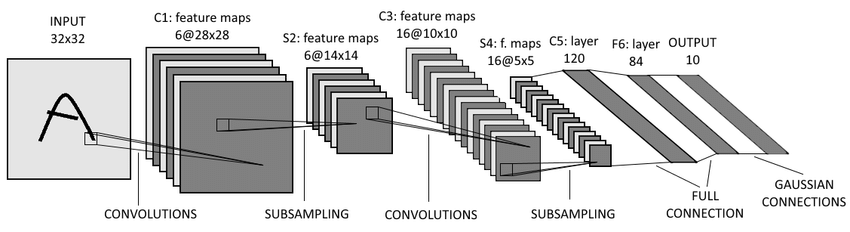

 Gradient-Based Learning Applied to Document Recognition paper by Y. Lecun, L. Bottou, Y. Bengio and P. Haffner (1998)

In [ ]:
flatten()

NameError: ignored

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


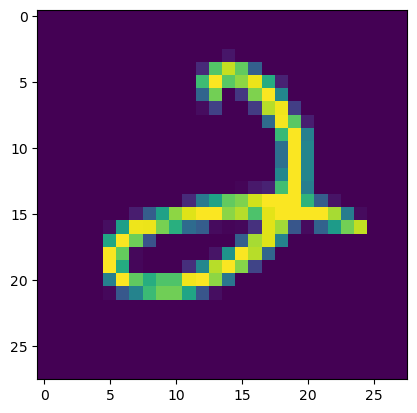

In [4]:
from matplotlib import pyplot as plt
index = 6344
plt.imshow(x_train[index])
plt.show()

In [5]:
print(y_train[index])

2


In [ ]:

Alesleanl 
nn-svg

plot neural net



NameError: name 'model' is not defined

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# as I've trained my model on MNIST as odd or even (binary classes)
target_names = ['avion', 'auto','ave', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camioneta']

# get predict prob and label
y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

reporte = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
print(reporte)